# HDS 5210 Final Project: Heart disease rate in Multiple Data Sets
#### prabhuchaitanya molabanti

This project is about heart diseases rate and its causing factors

i have taken data from kaggle and cdc.gov 


  















#####  DATASET 1:

  Heart Disease Dataset
  
  https://www.kaggle.com/datasets/yasserh/heart-disease-dataset
  
#####  DATASET 2:

   Heart Disease Mortality by State
  
  
   https://www.cdc.gov/nchs/pressroom/sosmap/heart_disease_mortality/heart_disease.ht

## Study Objectives
I will be working on the heart disease rate in multiple data sets. It is known that heart disease is unpredictable and that several factors are responsible for it. This dataset that I have taken contains some important factors that cause heart disease in people, based on a study that was conducted on a few patients. In another dataset, I have a list of states in America and their heart disease rate to get the full picture of how heart disease affects people.

## abbreviations:

1) age - age in years

2) sex - (1 = male; 0 = female)

3) cp - chest pain type (angia)

4) trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5) chol - serum cholestoral in mg/dl

6) fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7) restecg - resting electrocardiographic results

8) thalach - maximum heart rate achieved

9) exang - exercise induced angina (1 = yes; 0 = no)

10) oldpeak - ST depression induced by exercise relative to rest

11) slope - the slope of the peak exercise ST segment

12) ca - number of major vessels (0-3) colored by flourosopy

13) thal - 3 = normal; 2 = fixed defect;  1 = reversable defect

14) target - have disease or not (1=yes, 0=no)





 ## states abbreviations:
 
  'AK' => 'Alaska',                                                                                        
  
  'AZ' => 'Arizona',
  
  'AR' => 'Arkansas',
  
  'CA' => 'California',
  
  'CO' => 'Colorado',
  
  'CT' => 'Connecticut',
  
  'DE' => 'Delaware',
  
  'DC' => 'Washington DC',
  
  'FL' => 'Florida',
  
  'GA' => 'Georgia', 
  
  'HI' => 'Hawaii', 
  
  'ID' => 'Idaho',
  
  'IL' => 'Illinois',
  
  'IN' => 'Indiana',
  
  'IA' => 'Iowa',
  
  'KS' => 'Kansas',
  
  'KY' => 'Kentucky',
  
  'LA' => 'Louisiana',
  
  'ME' => 'Maine',
  
  'MD' => 'Maryland',
  
  'MA' => 'Massachusetts',
  
  'MI' => 'Michigan',
  
  'MN' => 'Minnesota',
  
  'MS' => 'Mississippi',
  
  'MO' => 'Missouri',
  
  'MT' => 'Montana',
  
  'NE' => 'Nebraska',
  
  'NV' => 'Nevada',
  
  'NH' => 'New Hampshire',
  
  'NJ' => 'New Jersey',
  
  'NM' => 'New Mexico',
  
  'NY' => 'New York',
  
  'NC' => 'North Carolina',
  
  'ND' => 'North Dakota',
  
  'OH' => 'Ohio',
  
  'OK' => 'Oklahoma',
  
  'OR' => 'Oregon',
  
  'PA' => 'Pennsylvania',
  
  'PR' => 'Puerto Rico',
  
  'RI' => 'Rhode Island',
  
  'SC' => 'South Carolina',
  
  'SD' => 'South Dakota',
  
  'TN' => 'Tennessee',
  
  'TX' => 'Texas',
  
  'UT' => 'Utah',
  
  'VT' => 'Vermont',
  
  'VA' => 'Virginia',
  
  'WA' => 'Washington',
  
  'WV' => 'West Virginia',
  
  'WI' => 'Wisconsin',
  
  'WY' => 'Wyoming',
  
  

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
import csv
import glob
import os

In [2]:
#read csv file
df1 = pd.read_csv("heart.csv")


In [3]:
df1.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
print(df1.shape)

(303, 14)


In [6]:
#Find the number of male and females in the data.
df1.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

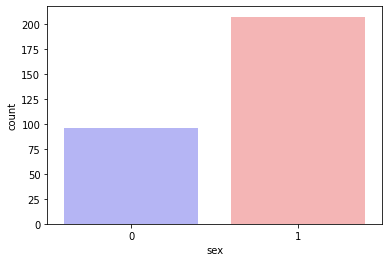

In [7]:
#plot the data
sns.countplot(x="sex", data=df1, palette="bwr")
plt.show()

### sex - (1 = male; 0 = female)

In [8]:
#count number of males and females
countFemale = len(df1[df1.sex == 0])
countMale = len(df1[df1.sex == 1])
print ("there are "+str(countFemale) + " females.")
print  ("there are "+str(countMale) + " males.")

there are 96 females.
there are 207 males.


## finding relation between age and some heart disease causing factors

In [9]:
#Find mean of age and cholestoral
df1["age"] = df1["age"].astype('float64')
df1["chol"] = df1["chol"].astype('float64')

a = df1["age"].mean()
b = df1["chol"].mean()

print(str(a) + " is age mean")
print (str(b) + " is cholestoral mean")

54.366336633663366 is age mean
246.26402640264027 is cholestoral mean


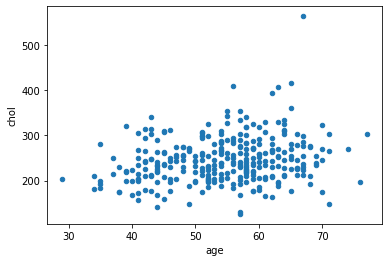

In [10]:
#plot scatter graph for age and cholestrol
df1.plot(x='age', y='chol', kind='scatter')
plt.show()

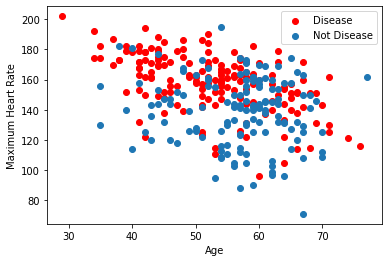

In [11]:
#plot scatter graph for maximum heart rate and age
plt.scatter(x=df1.age[df1.target==1], y=df1.thalach[(df1.target==1)], c="red")
plt.scatter(x=df1.age[df1.target==0], y=df1.thalach[(df1.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<Figure size 2160x3600 with 0 Axes>

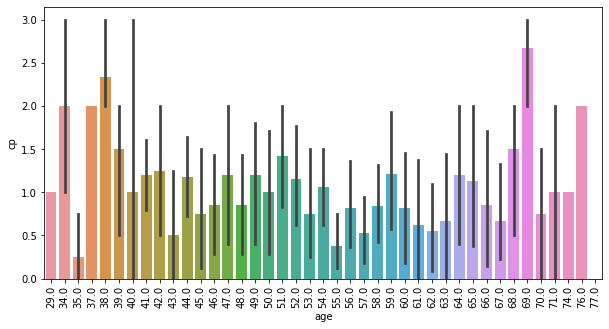

<Figure size 2160x3600 with 0 Axes>

In [12]:
#plot bar graph to find relation between chestpain and 
plt.figure(figsize=(10, 5))

ax = sns.barplot(x = "age", y = "cp", data = df1)
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.figure(figsize=(30, 50)) 




Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :

1 = typical angina - It is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin

2 = atypical angina - It is defined as  pressure or squeezing like sensation that is usually caused when your heart muscle doesn't get an adequate supply of oxygenated blood.


3 = non — anginal pain - it is recurring pain in your chest — typically, behind your breast bone and near your heart

4 = asymptotic angina - it is a silent chest pain


## data findings
### Based on the data presented above, we can conclude that heart disease mostly effected people of age between  40 to 60


## finding the difference between target 1 and target 0

### target - have disease or not (1=yes, 0=no)

In [13]:
#Find the number of patients who have heart diseases in the data.
df1.target.value_counts()

1    165
0    138
Name: target, dtype: int64

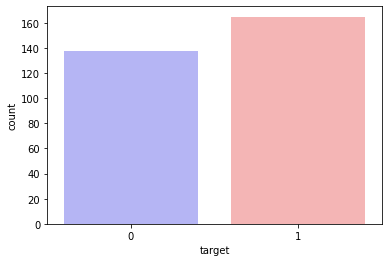

In [14]:
#plot the data for target column
sns.countplot(x="target", data=df1, palette="bwr")
plt.show()

In [15]:
#Find the percentage of patients
countHaveDisease = len(df1[df1.target == 1])
countNoDisease = len(df1[df1.target == 0])

print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.target))*100)))
print("Percentage of Patients Have no Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Have no Heart Disease: 45.54%


In [16]:
#find the difference between target 1 and target 0  

for (target), group in df1.groupby(['target']):
	group.to_csv(f'{target}.csv', index=False)

subdf0=pd.read_csv("0.csv")
subdf1=pd.read_csv("1.csv")


In [17]:
subdf0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1,0,160,286.0,0,0,108,1,1.5,1,3,2,0
1,67.0,1,0,120,229.0,0,0,129,1,2.6,1,2,3,0
2,62.0,0,0,140,268.0,0,0,160,0,3.6,0,2,2,0
3,63.0,1,0,130,254.0,0,0,147,0,1.4,1,1,3,0
4,53.0,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0


In [18]:
# Using DataFrame.max() method to get chol for target 0
subdf0["chol"].max()

409.0

In [19]:
subdf1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [20]:
# Using DataFrame.mean() method to get chol average for target 1
subdf1["chol"].max()

564.0

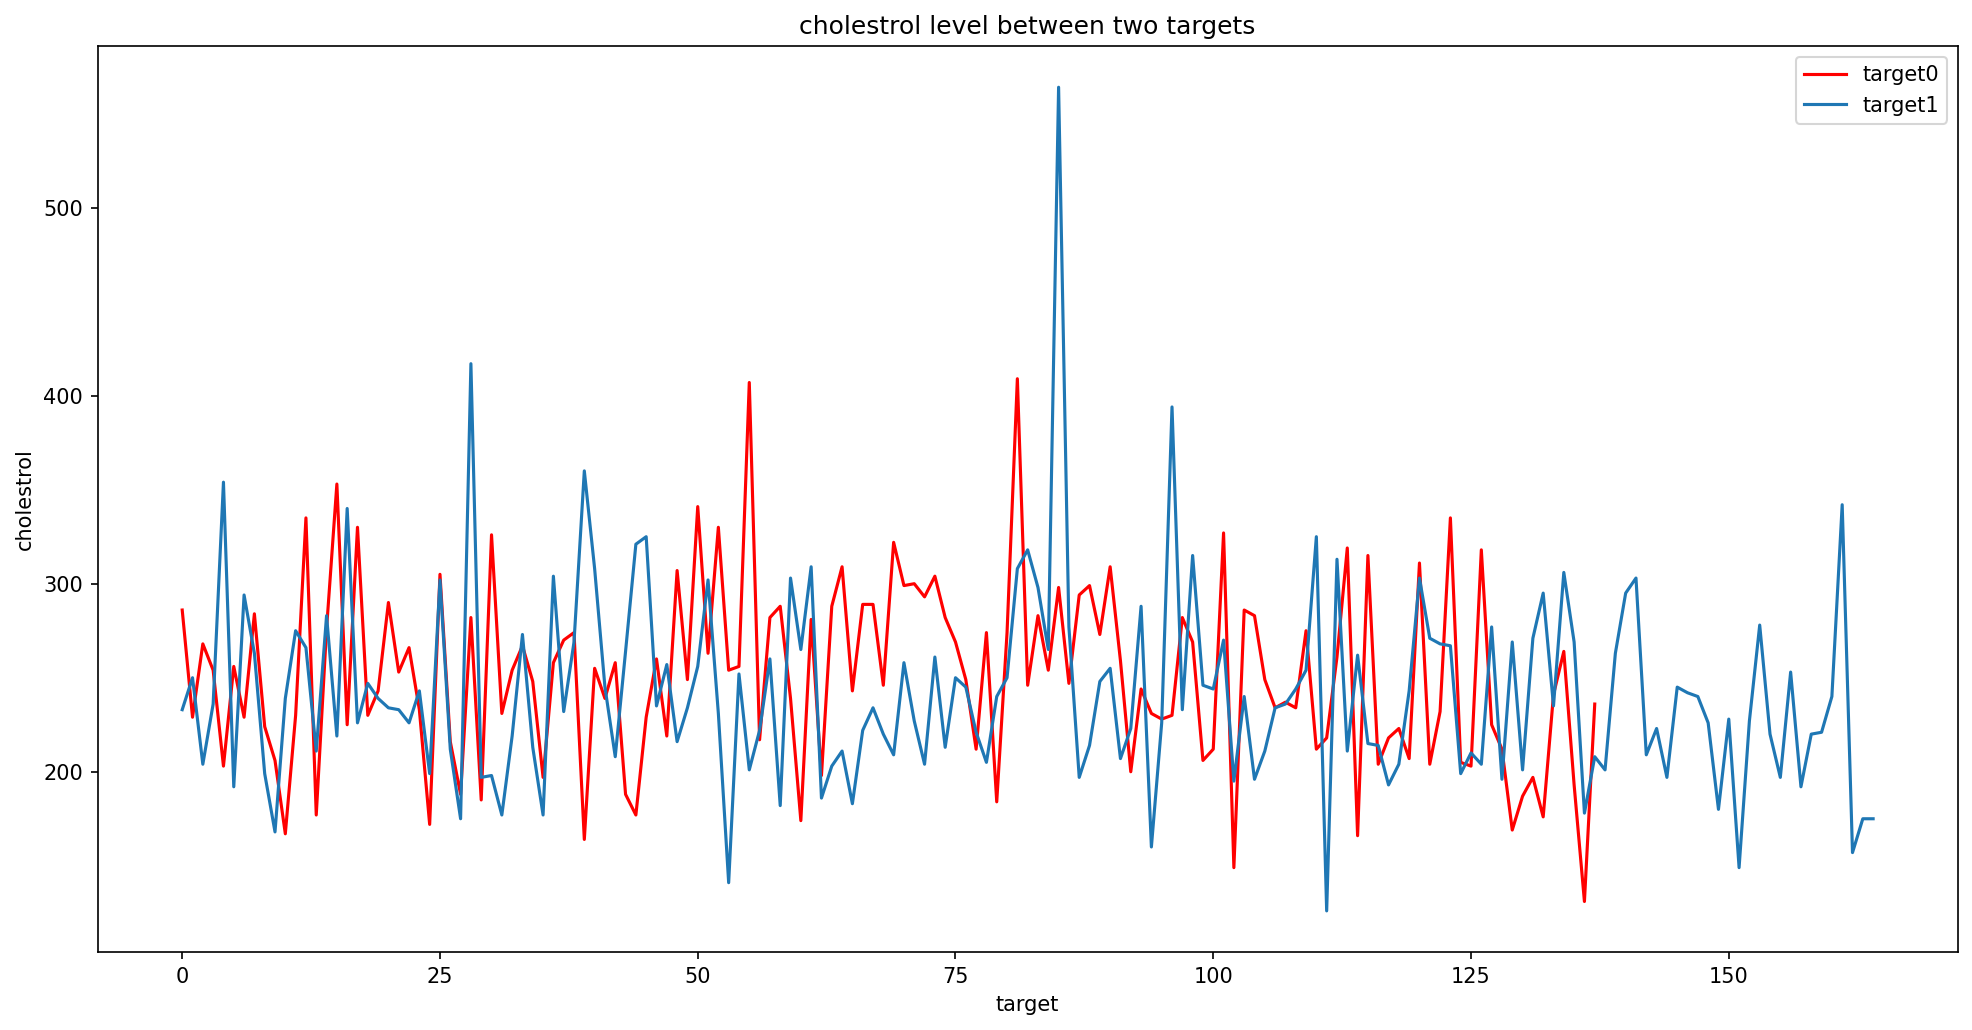

In [21]:
# Visualizing The chol(serum cholestoral in mg/dl) for target patients 
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  

# plot graph between two df to find the difference
subdf0['chol'].plot(x = subdf0.target , y = subdf0.chol, label='target0', color='red')

subdf1['chol'].plot (x = subdf1.target, y = subdf1.chol, label='target1')

# adding title to the plot
plt.title('cholestrol level between two targets')
  
# adding Label to the x-axis

plt.xlabel('target')

# adding Label to the y-axis
plt.ylabel('cholestrol')
# adding legend to the curve
plt.legend()

### Data findings
### From the above plot, we can observe that the cholestrol level for target 1 is high compared to the target 0 cholestrol rate.As a result, cholesterol levels play a significant role in the development of heart disease. 



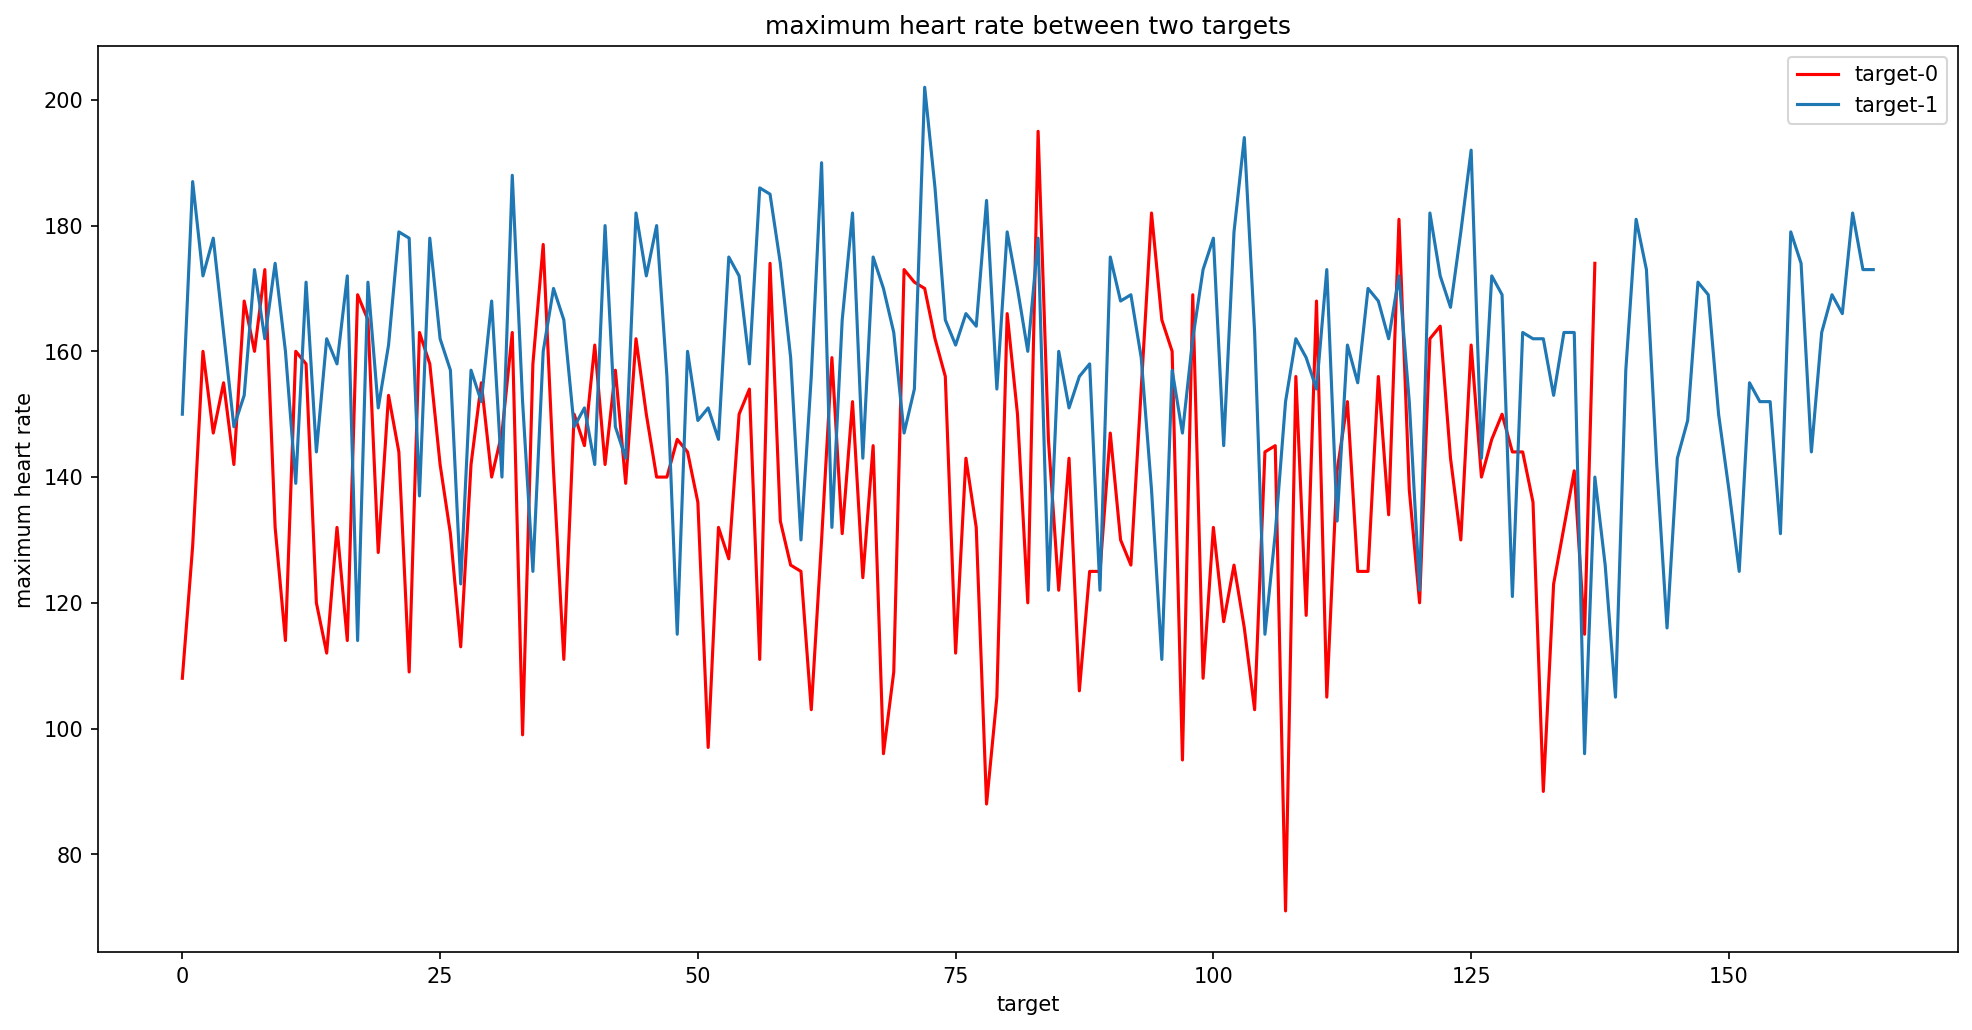

In [22]:
# Visualizing maximum heart rate between patients
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  

# plot graph between two df to find the difference
subdf0['thalach'].plot( label='target-0', color='red')

subdf1['thalach'].plot ( label='target-1')

# adding title to the plot
plt.title('maximum heart rate between two targets')
  
# adding Label to the x-axis

plt.xlabel('target')

# adding Label to the y-axis
plt.ylabel('maximum heart rate')
# adding legend to the curve
plt.legend()

### Data findings
### From the above finding it is clear patients who have the disease are having un healthy heart rates 

 thalasemia  - 3 = normal; 2 = fixed defect;  1 = reversable defect


In [23]:
#finding thalasemia rate in target 1
subdf1['thal'].value_counts()


2    130
3     28
1      6
0      1
Name: thal, dtype: int64

In [24]:
#finding thalasemia rate in target 0

subdf0['thal'].value_counts()


3    89
2    36
1    12
0     1
Name: thal, dtype: int64

### Data findings
from the above finding it is clear that people with heart disease have more fixed defect thalasemia than the others

### opening the second datafile

In [25]:
# opening json file
df2 = pd.read_json('data-table.json')
    




In [26]:
#converting json file into csv file

df2.to_csv("data-table.csv")

In [27]:
#opening converted csv file into 
df2 = pd.read_csv("data-table.csv")


In [28]:
df2.head()

,Unnamed: 0,YEAR,STATE,RATE,DEATHS
0,0,2020,AL,237.5,14739
1,1,2020,AK,139.8,915
2,2,2020,AZ,144.8,14196
3,3,2020,AR,222.5,8621
4,4,2020,CA,144.0,66538


In [29]:
df2.dtypes

Unnamed: 0      int64
YEAR            int64
STATE          object
RATE          float64
DEATHS         object
dtype: object

In [30]:
# Modifying a column to further use it
df2["DEATHS"] = df2["DEATHS"].str.replace(",","").astype(float)
df2["DEATHS"] = pd.to_numeric(df2["DEATHS"])



In [31]:
df2.dtypes

Unnamed: 0      int64
YEAR            int64
STATE          object
RATE          float64
DEATHS        float64
dtype: object

In [32]:
#check unnamed column
df2.columns.str.match("Unnamed")

array([ True, False, False, False, False])

In [33]:
#Remove unnamed column
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

df2.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,237.5,14739.0
1,2020,AK,139.8,915.0
2,2020,AZ,144.8,14196.0
3,2020,AR,222.5,8621.0
4,2020,CA,144.0,66538.0


In [34]:
#merging two data files
df_concat = pd.concat([df1, df2], axis=1)
df_concat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,YEAR,STATE,RATE,DEATHS
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,2020,AL,237.5,14739.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,2020,AK,139.8,915.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,2020,AZ,144.8,14196.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,2020,AR,222.5,8621.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,2020,CA,144.0,66538.0


In [35]:
#check if there is unnamed column
df_concat.columns.str.match("Unnamed")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [36]:
#drop any NAN values
df_concat.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,YEAR,STATE,RATE,DEATHS
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,2020,AL,237.5,14739.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,2020,AK,139.8,915.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,2020,AZ,144.8,14196.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,2020,AR,222.5,8621.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,2020,CA,144.0,66538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,2015,WI,156.0,11473.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,2015,WY,159.4,1030.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,2014,AL,224.0,12461.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,2014,AK,146.6,782.0


## finding heart disease rate and death rate from the merged data file

In [37]:
## find the  heart disease rate and death rate for the year 2019 and 2020
df_2019_20 = df_concat.iloc[0:100]


[Text(0, 0, 'AL'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'WY')]

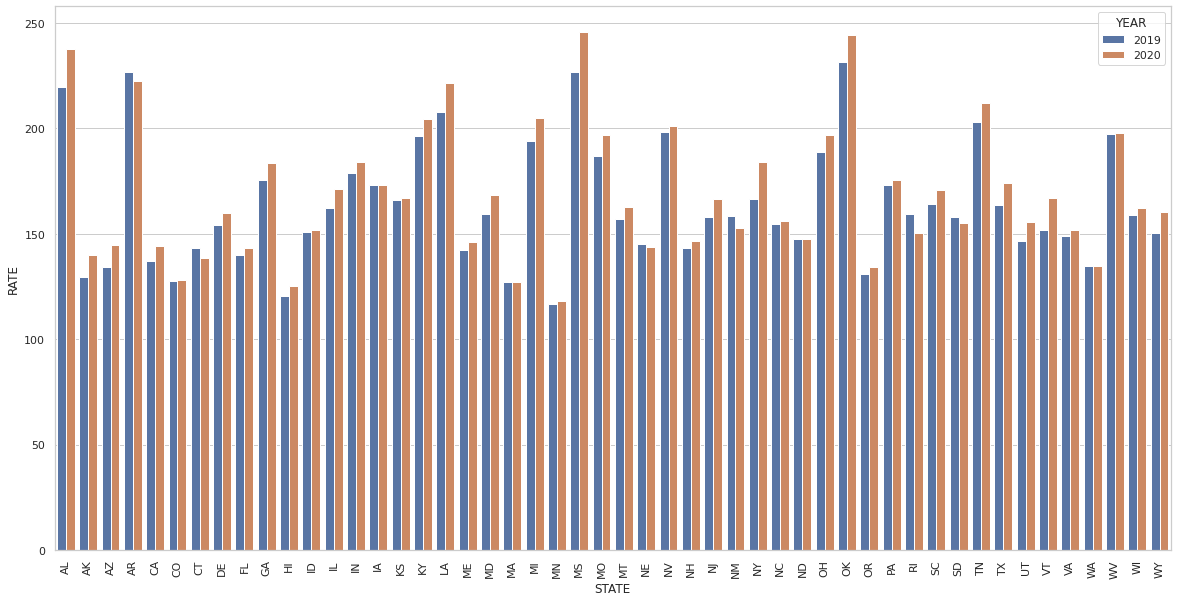

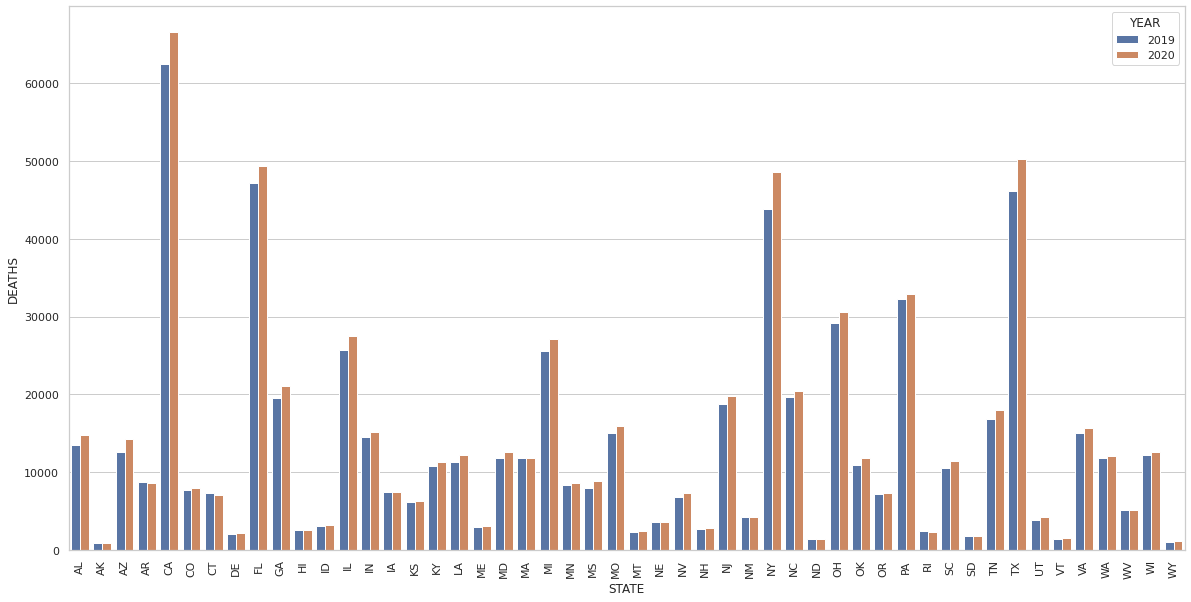

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: whitegrid in the background:
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "RATE",  hue = "YEAR", data = df_2019_20 )
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


#Plot graph for number of deaths
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "DEATHS",  hue = "YEAR", data = df_2019_20 )
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)







In [39]:
## find the  heart disease rate and death rate for the year 2017 and 2018
df_2017_18 = df_concat.iloc[100:200]

[Text(0, 0, 'AL'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'WY')]

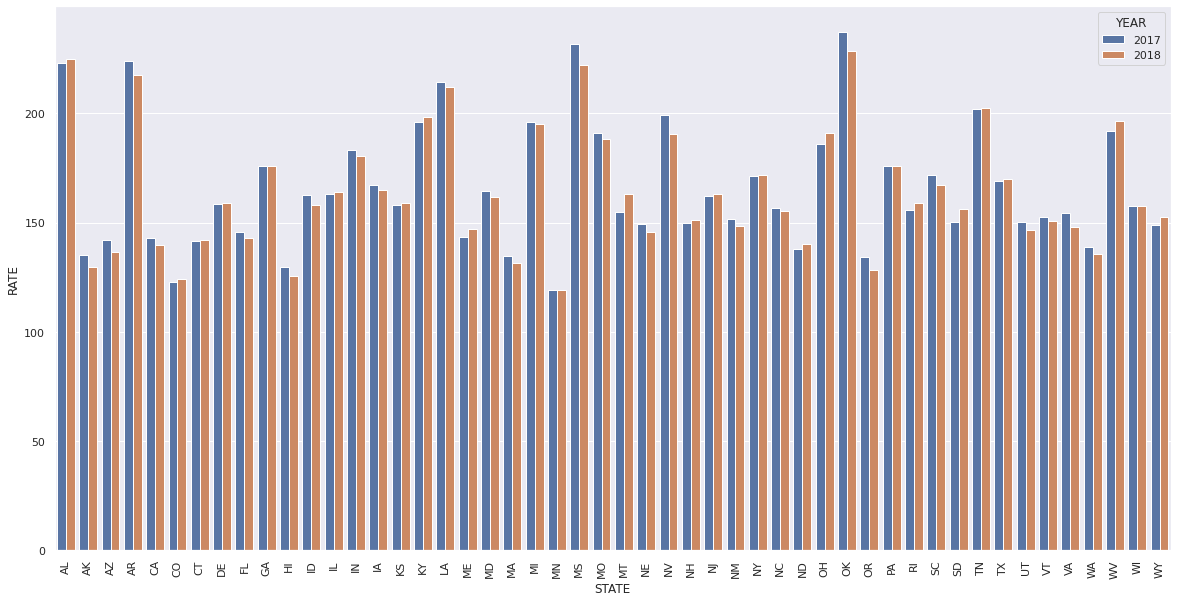

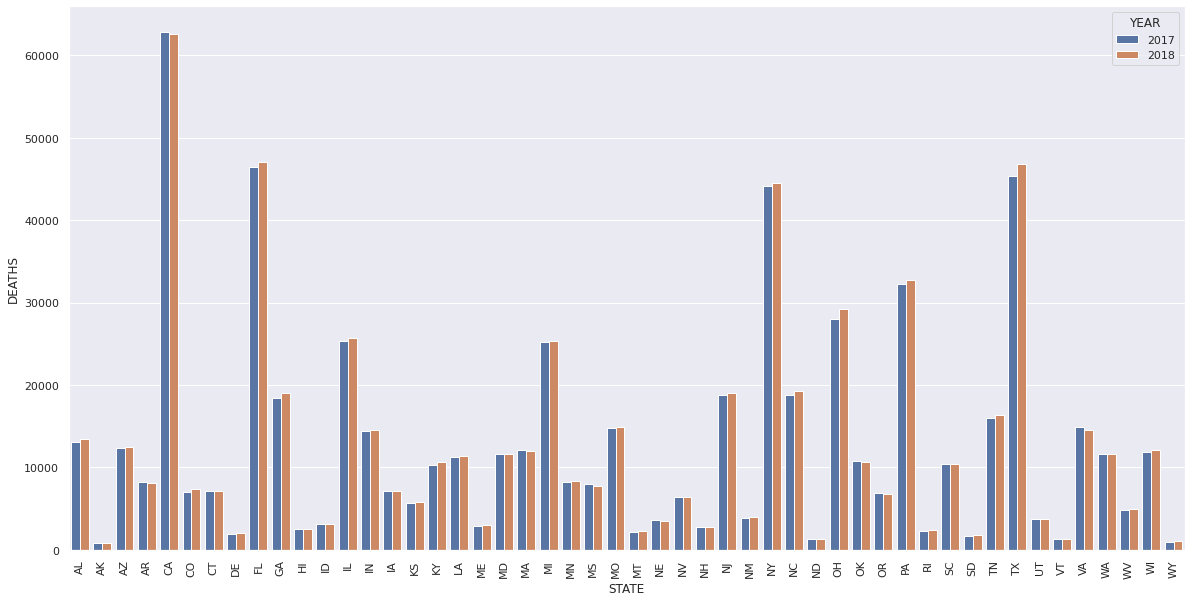

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "RATE",  hue = "YEAR", data = df_2017_18 )
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

#Plot graph for number of deaths

plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "DEATHS",  hue = "YEAR", data = df_2017_18 )
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


In [41]:
## find the  heart disease rate and death rate for the year 2014 and 2016

In [42]:
df_2015_16_14 = df_concat.iloc[200:300]

[Text(0, 0, 'AL'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'WY')]

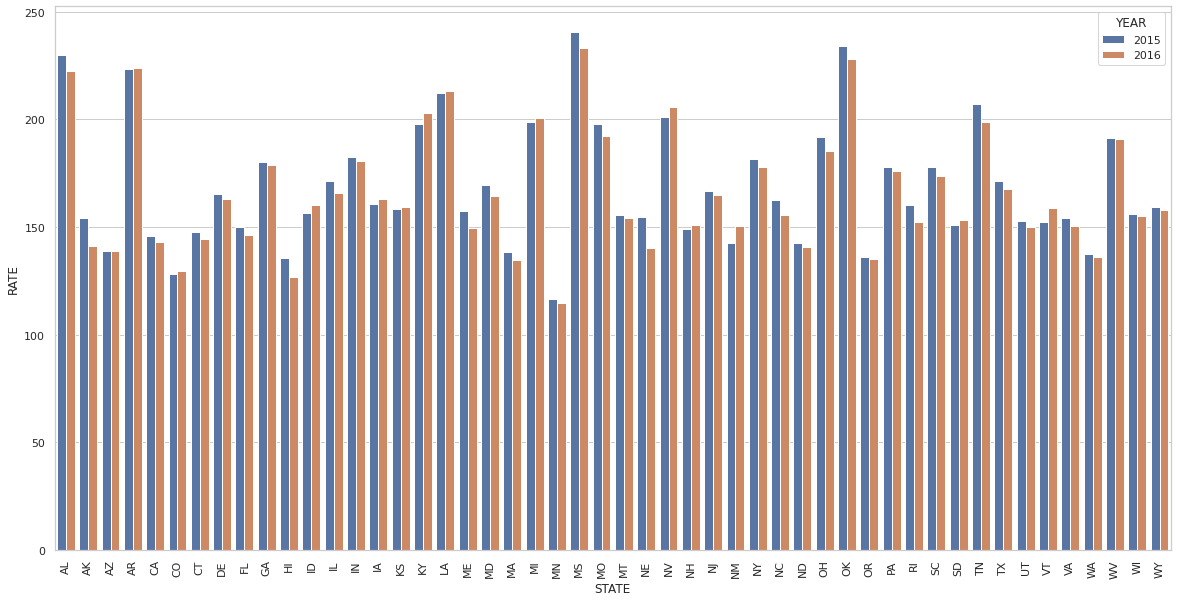

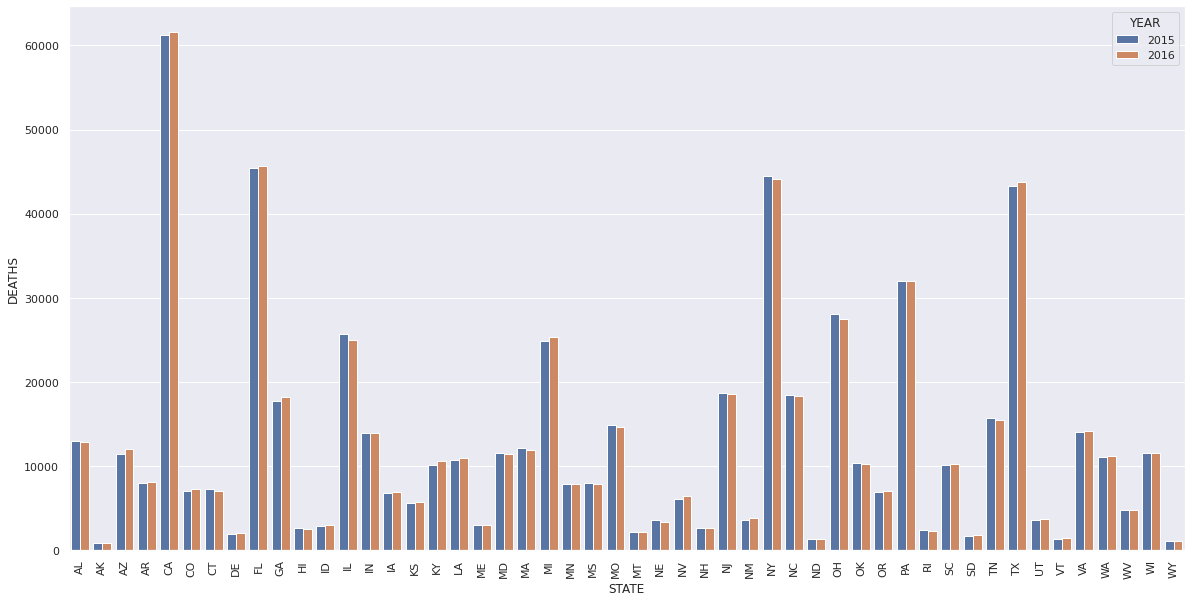

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: whitegrid in the background:
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "RATE",  hue = "YEAR", data = df_2015_16_14)
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

#Plot graph for number of deaths

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "STATE", y = "DEATHS",  hue = "YEAR", data = df_2015_16_14)
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



## DATA FINDINGS



From the above bar plot we can see that heart diseases are steadily increasing.

In [44]:
#import sql
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [45]:
q = """
     SELECT YEAR,STATE,DEATHS,RATE
     FROM df_concat
     WHERE YEAR = 2020 AND 2019
     ORDER BY DEATHS DESC
     LIMIT 10
     ;


     
"""
 



     



DEATHS = pysqldf(q)
STATE = pysqldf(q)
DEATHS
STATE



,YEAR,STATE,DEATHS,RATE
0,2020,CA,66538.0,144.0
1,2020,TX,50281.0,173.9
2,2020,FL,49287.0,143.1
3,2020,NY,48546.0,183.9
4,2020,PA,32936.0,175.7
5,2020,OH,30547.0,196.9
6,2020,IL,27460.0,171.4
7,2020,MI,27127.0,205.0
8,2020,GA,21116.0,183.7
9,2020,NC,20373.0,156.2


### Data findings 
from the above data we can see that the most effected states are California,Texas,Florida

In [46]:
#find total number of deaths 
Total = df_2019_20['DEATHS'].sum()
print ("The total number of deaths due to heart disease in 2019 and 2020 is  " + str(Total))


Total = df_2017_18['DEATHS'].sum()
print ("The total number of deaths due to heart disease in 2017 and 2018 is  " + str(Total))

Total = df_2015_16_14['DEATHS'].sum()
print ("The total number of deaths due to heart disease in 2015,2016 and 2014 is  " + str(Total))







The total number of deaths due to heart disease in 2019 and 2020 is  1353466.0
The total number of deaths due to heart disease in 2017 and 2018 is  1300259.0
The total number of deaths due to heart disease in 2015,2016 and 2014 is  1266510.0


## SUMMARY

From the above findings, we can find that heart disease is a leading cause of death in modern society. From the data, factors like cholesterol, age, and chest pain are the leading causes of heart diseases. Most people between the ages of 40 and 60 are susceptible to heart diseases, and a trend can be observed from the data that the heart disease rate and its effects are steadily increasing through the years.now lets look at some key factors that cause hear


cholestrol -cholesterol helps to create healthy cells, but having high amounts can put you at risk for heart disease. You can form fatty deposits in your blood vessels if you have high cholesterol. Over time, these deposits thicken and restrict the amount of blood that can pass through your arteries.

Age and angina (chest pain): Aging weakens the immune system and increases the risk of heart disease; angina is caused by a lack of blood supply to the heart. This is frequently brought on by the development of thick plaques on the inner walls of the arteries that supply the heart with blood. Particularly when exercising, these plaques cause the arteries to constrict and impede the flow of blood to the heart. Angia is also the cause of sudden heart attacks.



